In [1]:
from pycaret.anomaly import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
import seaborn as sns
sns.set_theme(style="ticks",color_codes=True)
%matplotlib inline


### About Dataset
# Credit Card Payment Default Prediction using anomaly
Credit card is a flexible tool by which a customer can use a bank's money for a short period of time.

Predicting accurately which customers are most probable to default represents a significant business 
opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which 
emphasizes the impact of risk prediction on both the consumers and banks.

This would inform the bank’s decisions on criteria to approve a credit card application and also decide 
upon what credit limit to provide.

This dataset contains information on default payments, demographic factors, credit data, history of 
payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Using the information given, predict the probability of a customer defaulting in the next month.

About Data Source:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.)

## Anomaly detection :
is the process of analyzing company data to find data points that don't align with a company's standard data pattern

Anomaly detection aims at finding unexpected or rare events in data streams, commonly referred to as anomalous events. Detecting anomalies could be useful directly or as a first insight to find new knowledge in the data
### [Attributes information:]()

LIMITBAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit <br>
SEX : Gender (1=male, 2=female)<br>
EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br> 
MARRIAGE : Marital status (1=married, 2=single, 3=divorced) <r>
AGE : Age of the client <br>
PAY0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY2 : Repayment status in August, 2005 (scale same as above)<br> 
PAY3 : Repayment status in July, 2005 (scale same as above)<br>
PAY4 : Repayment status in June, 2005 (scale same as above)<br> 
PAY5 : Repayment status in May, 2005 (scale same as above)<br>
PAY6 : Repayment status in April, 2005 (scale same as above)<br> 
BILLAMT1 : Amount of bill statement in September, 2005 (NT dollar)<br>
BILLAMT2 : Amount of bill statement in August, 2005 (NT dollar)<br> 
BILLAMT3 : Amount of bill statement in July, 2005 (NT dollar)<br>
BILLAMT4 : Amount of bill statement in June, 2005 (NT dollar) <br>
BILLAMT5 : Amount of bill statement in May, 2005 (NT dollar)<br>
BILLAMT6 : Amount of bill statement in April, 2005 (NT dollar)<br> 
PAYAMT1 : Amount of previous payment in September, 2005 (NT dollar)<br>
PAYAMT2 : Amount of previous payment in August, 2005 (NT dollar) <br>
PAYAMT3 : Amount of previous payment in July, 2005 (NT dollar)<br>
PAYAMT4 : Amount of previous payment in June, 2005 (NT dollar) <br>
PAYAMT5 : Amount of previous payment in May, 2005 (NT dollar)<br>
PAYAMT6 : Amount of previous payment in April, 2005 (NT dollar) defaultpaymentnextmonth <br>
Target Variable: <br>
Default : payment (1=yes, 0=no)<br><br>

In [2]:
df = pd.read_csv("credit.csv")
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
23997,30000,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
23998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,-0.294417,51105.607208,49112.465792,4.687850e+04,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,1.146316,73647.549162,71186.768604,6.931527e+04,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3479.750000,2907.750000,2.594250e+03,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22217.000000,21107.000000,2.000950e+04,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66996.750000,63997.250000,6.022025e+04,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
df['default'].value_counts()

0    18694
1     5306
Name: default, dtype: int64

In [7]:
df['default'].value_counts(normalize = True)*100

0    77.891667
1    22.108333
Name: default, dtype: float64

In [8]:
# summarize the number of unique values in each column
print(df.nunique())

LIMIT_BAL       80
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    18660
BILL_AMT2    18363
BILL_AMT3    18134
BILL_AMT4    17733
BILL_AMT5    17312
BILL_AMT6    16963
PAY_AMT1      6938
PAY_AMT2      6904
PAY_AMT3      6589
PAY_AMT4      6036
PAY_AMT5      5985
PAY_AMT6      6047
default          2
dtype: int64


In [9]:
# locate rows of duplicate data
df.duplicated().any()

True

In [10]:
df = df.drop_duplicates()
df.shape

(23976, 24)

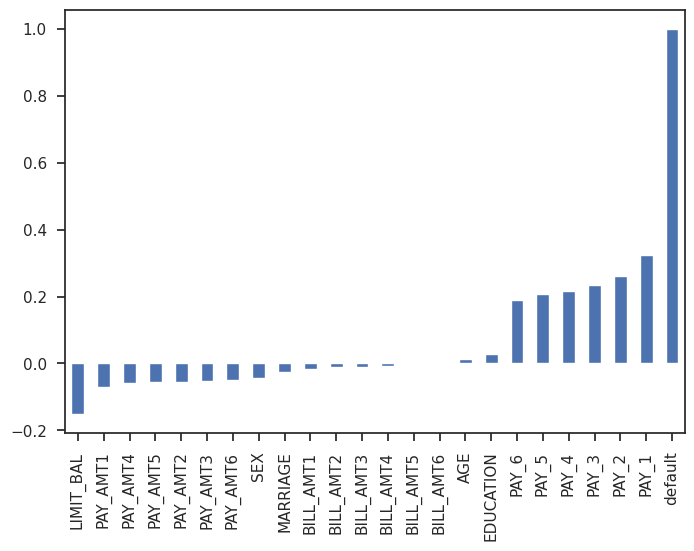

In [11]:
# plot correlation
df.corr()['default'].sort_values().plot(kind='bar')
plt.show()

In [12]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(23976, 24)

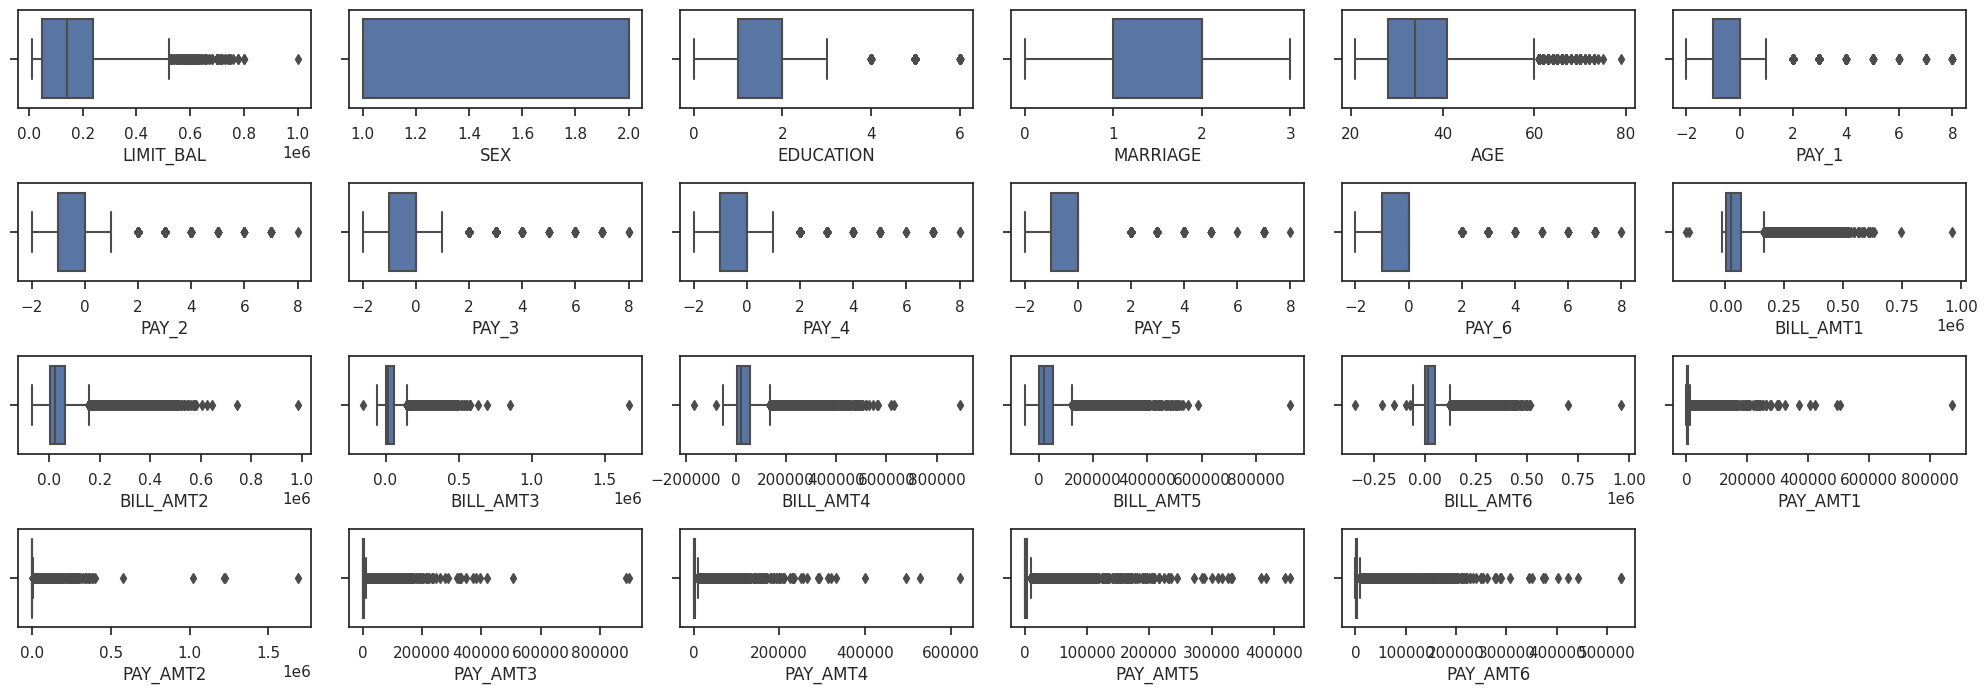

In [13]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 25:
        plt.subplot(6,6,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


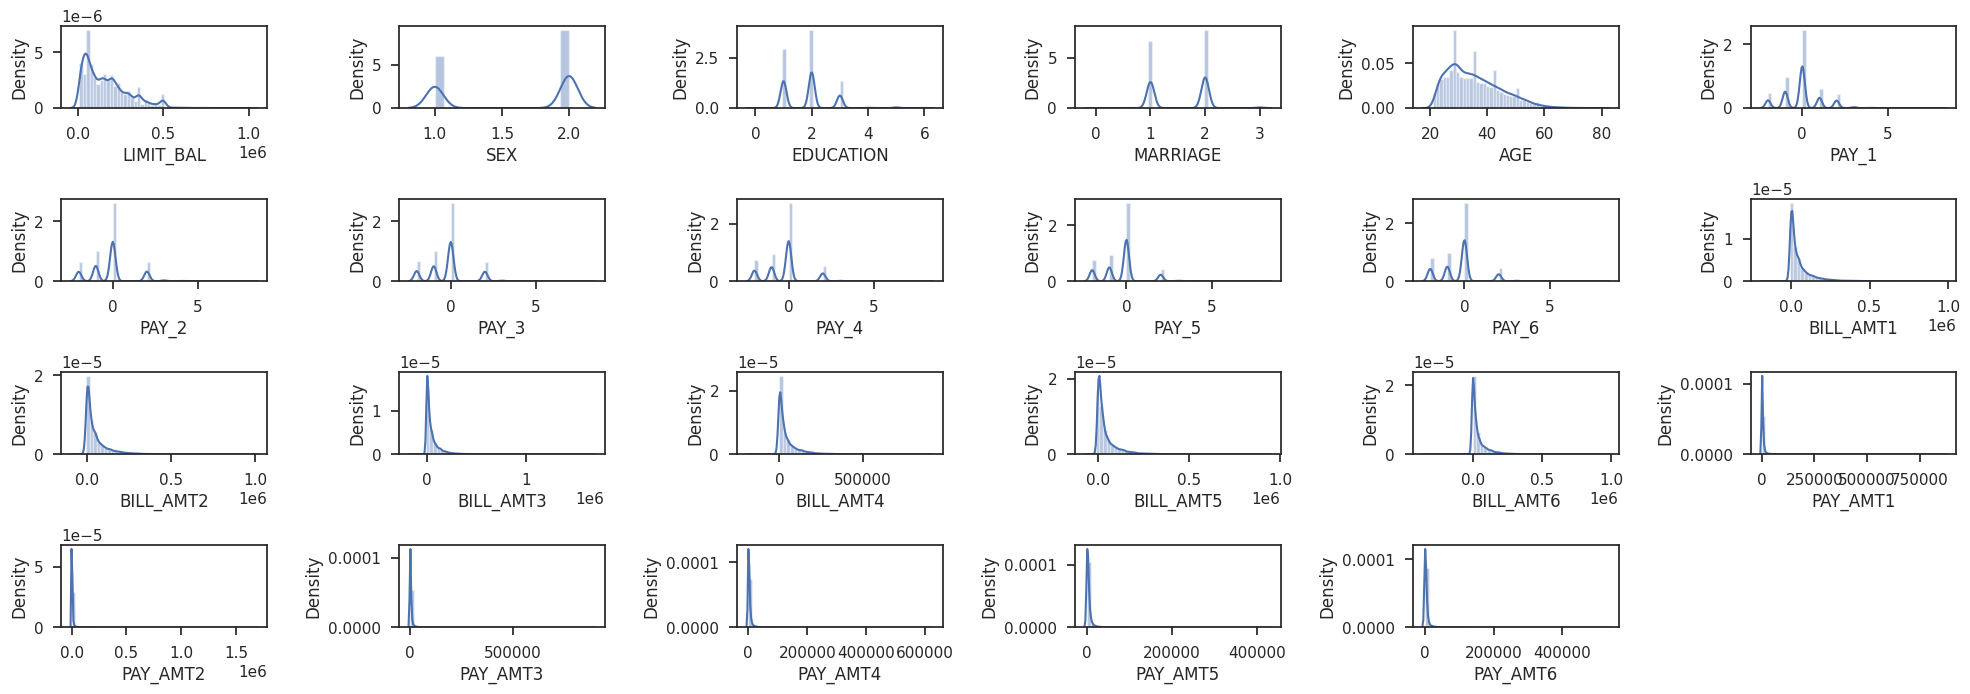

In [14]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 25:
        plt.subplot(6,6,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


In [15]:
train, unseen = train_test_split(df,test_size=0.10, random_state=42,shuffle=True,stratify = df['default'])
train.shape, unseen.shape


((21578, 24), (2398, 24))

In [16]:
train["default"].value_counts()

0    16807
1     4771
Name: default, dtype: int64

In [17]:
train["default"].value_counts(normalize=True)

0    0.778895
1    0.221105
Name: default, dtype: float64

In [18]:
unseen["default"].value_counts()

0    1868
1     530
Name: default, dtype: int64

In [19]:
unseen["default"].value_counts(normalize=True)

0    0.778982
1    0.221018
Name: default, dtype: float64

<b>Pycaret<b/> :  is an open-source,low-code machine learning library in python that
automates machine learning workflows.

it is an end-to-end machine learning and model management tool that exponentially<br>
speeds up the experiment cycle and makes you more productive.<br>
compare with the other open-source machine learning libraries.<br><br><b>Pycaret<b> is an alternate low-code
library that can be used to replace hundreds of lines of code with few lines only.<br>

Pycaret is essentiall a Python wrapper around several machine learning<br> libraries and frameworks,
such as scikit-learn,XGBoost,LightGBM,CatBoost,spaCy,Optuna,Hyperopt,Ray,<br>
and a few more

In [20]:
#set up environment final best result
history= setup(data=train,
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     transformation=True,
                     session_id=123)


,Description,Value
0,session_id,123
1,Original Data,"(21578, 24)"
2,Missing Values,False
3,Numeric Features,14
4,Categorical Features,10
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(21578, 93)"
9,CPU Jobs,-1


In [21]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [22]:
iforest = create_model('iforest')
knn = create_model('knn')
lof = create_model('lof')
svm = create_model('svm')
pca = create_model('pca')

In [23]:
iforest 

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [24]:
iforest_assign = assign_model(iforest)
knn_assign = assign_model(knn)
lof_assign = assign_model(lof)
svm_assign = assign_model(svm)
pca_assign = assign_model(pca)

# IFOREST

In [25]:
prediction_iforest = predict_model(iforest,data = unseen)
prediction_iforest

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
20239,30000,2,2,2,25,0,0,2,2,2,...,28806.0,3300.0,1600.0,1200.0,0.0,2200.0,0.0,1,0,-0.026053
5691,100000,1,1,2,32,1,2,2,0,0,...,53170.0,4000.0,0.0,2000.0,2000.0,3000.0,0.0,0,0,-0.052525
22163,50000,2,2,2,25,0,0,0,0,0,...,29217.0,2000.0,1740.0,1400.0,1000.0,1000.0,1100.0,0,0,-0.159470
22313,220000,2,1,2,28,0,0,0,0,0,...,92905.0,8600.0,11000.0,6000.0,10082.0,3400.0,3825.0,0,0,-0.121937
8075,170000,1,2,2,31,0,0,0,0,0,...,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0,0,-0.069763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,10000,1,2,2,21,0,0,0,0,-1,...,0.0,2000.0,1000.0,188.0,2538.0,0.0,0.0,0,0,-0.068203
8301,60000,1,1,1,34,0,0,0,0,0,...,42689.0,1948.0,1966.0,2000.0,1600.0,1600.0,1600.0,0,0,-0.136842
4197,50000,2,2,1,34,0,0,0,-1,-1,...,15252.0,1200.0,1000.0,19206.0,1500.0,0.0,345.0,0,0,-0.046031
8875,260000,2,1,2,30,2,-1,-1,-1,-1,...,1443.0,2000.0,1500.0,1443.0,1443.0,1443.0,3943.0,0,0,-0.077992


In [26]:
prediction_iforest[prediction_iforest['Anomaly'] ==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
7508,20000,1,3,2,22,-2,-2,-1,-1,2,...,18752.0,2.0,431.0,20355.0,0.0,2732.0,7189.0,1,1,0.054337
22459,350000,2,1,1,37,-2,-2,-2,-2,-2,...,67650.0,27821.0,36532.0,34022.0,20000.0,117650.0,74086.0,0,1,0.062993
19849,310000,1,1,2,32,-2,-2,-2,-2,-2,...,4553.0,32617.0,17417.0,8702.0,12926.0,4575.0,1990.0,0,1,0.015998
13387,220000,1,3,1,39,2,2,2,2,2,...,191837.0,8000.0,8000.0,7000.0,7000.0,7000.0,0.0,1,1,0.030655
3799,120000,1,1,2,41,1,-2,-2,-1,0,...,60200.0,0.0,0.0,58000.0,2000.0,2000.0,0.0,0,1,0.002046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,500000,1,1,1,45,-1,-1,-1,-1,-1,...,38102.0,162003.0,32611.0,200967.0,22074.0,38272.0,3491.0,0,1,0.028361
15664,430000,2,2,1,42,2,2,2,2,2,...,308523.0,12700.0,13000.0,11000.0,0.0,19000.0,15000.0,1,1,0.050112
5598,640000,2,1,1,50,-2,-2,-2,-2,-2,...,23910.0,8853.0,22243.0,9877.0,10110.0,24616.0,5952.0,0,1,0.016576
10291,200000,1,2,2,27,0,-1,-1,-1,-2,...,-1136.0,16140.0,1000.0,0.0,0.0,0.0,0.0,0,1,0.001908


# KNN

In [27]:
prediction_knn = predict_model(knn,data = unseen)
prediction_knn

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
20239,30000,2,2,2,25,0,0,2,2,2,...,28806.0,3300.0,1600.0,1200.0,0.0,2200.0,0.0,1,0,1.832303
5691,100000,1,1,2,32,1,2,2,0,0,...,53170.0,4000.0,0.0,2000.0,2000.0,3000.0,0.0,0,0,2.538464
22163,50000,2,2,2,25,0,0,0,0,0,...,29217.0,2000.0,1740.0,1400.0,1000.0,1000.0,1100.0,0,0,0.564235
22313,220000,2,1,2,28,0,0,0,0,0,...,92905.0,8600.0,11000.0,6000.0,10082.0,3400.0,3825.0,0,0,1.365465
8075,170000,1,2,2,31,0,0,0,0,0,...,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0,0,2.768403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,10000,1,2,2,21,0,0,0,0,-1,...,0.0,2000.0,1000.0,188.0,2538.0,0.0,0.0,0,0,2.102613
8301,60000,1,1,1,34,0,0,0,0,0,...,42689.0,1948.0,1966.0,2000.0,1600.0,1600.0,1600.0,0,0,1.150190
4197,50000,2,2,1,34,0,0,0,-1,-1,...,15252.0,1200.0,1000.0,19206.0,1500.0,0.0,345.0,0,0,2.884825
8875,260000,2,1,2,30,2,-1,-1,-1,-1,...,1443.0,2000.0,1500.0,1443.0,1443.0,1443.0,3943.0,0,0,1.853274


In [28]:
prediction_knn[prediction_knn['Anomaly'] ==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
7508,20000,1,3,2,22,-2,-2,-1,-1,2,...,18752.0,2.0,431.0,20355.0,0.0,2732.0,7189.0,1,1,3.978803
23497,610000,1,3,2,29,0,0,-1,-1,-1,...,62950.0,7062.0,4017.0,6434.0,68290.0,2045.0,8007.0,0,1,3.540199
18345,230000,2,2,2,40,0,0,-1,-1,-1,...,3890.0,7105.0,1762.0,1228.0,8599.0,3890.0,6999.0,0,1,3.630629
15980,400000,2,2,1,37,-2,-2,-2,-1,0,...,19565.0,13256.0,4039.0,10692.0,8000.0,9000.0,1000.0,0,1,3.395026
23930,410000,1,1,2,34,0,0,0,-1,-1,...,-15.0,17259.0,18600.0,1474.0,1428.0,0.0,0.0,1,1,3.838319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15664,430000,2,2,1,42,2,2,2,2,2,...,308523.0,12700.0,13000.0,11000.0,0.0,19000.0,15000.0,1,1,3.626927
1652,30000,2,3,2,40,-1,0,0,-1,2,...,5346.0,7006.0,0.0,196.0,0.0,5300.0,0.0,0,1,3.426254
12984,300000,2,1,2,31,0,0,0,-1,-1,...,12565.0,30000.0,5000.0,5045.0,10288.0,5000.0,5000.0,1,1,3.382282
8777,500000,2,2,2,27,0,0,0,0,0,...,394163.0,5188.0,3417.0,3000.0,1276.0,388071.0,11700.0,0,1,3.385858


# LOF

In [29]:
prediction_lof = predict_model(lof,data = unseen)
prediction_lof

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
20239,30000,2,2,2,25,0,0,2,2,2,...,28806.0,3300.0,1600.0,1200.0,0.0,2200.0,0.0,1,0,1.000744
5691,100000,1,1,2,32,1,2,2,0,0,...,53170.0,4000.0,0.0,2000.0,2000.0,3000.0,0.0,0,0,1.053094
22163,50000,2,2,2,25,0,0,0,0,0,...,29217.0,2000.0,1740.0,1400.0,1000.0,1000.0,1100.0,0,0,0.976403
22313,220000,2,1,2,28,0,0,0,0,0,...,92905.0,8600.0,11000.0,6000.0,10082.0,3400.0,3825.0,0,0,1.425102
8075,170000,1,2,2,31,0,0,0,0,0,...,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0,0,1.411940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,10000,1,2,2,21,0,0,0,0,-1,...,0.0,2000.0,1000.0,188.0,2538.0,0.0,0.0,0,1,1.618044
8301,60000,1,1,1,34,0,0,0,0,0,...,42689.0,1948.0,1966.0,2000.0,1600.0,1600.0,1600.0,0,0,1.052712
4197,50000,2,2,1,34,0,0,0,-1,-1,...,15252.0,1200.0,1000.0,19206.0,1500.0,0.0,345.0,0,0,1.158657
8875,260000,2,1,2,30,2,-1,-1,-1,-1,...,1443.0,2000.0,1500.0,1443.0,1443.0,1443.0,3943.0,0,0,1.209580


In [30]:
prediction_lof[prediction_lof['Anomaly'] ==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
23745,300000,1,2,1,44,0,0,2,2,0,...,160385.0,21000.0,6000.0,3662.0,6000.0,6000.0,6000.0,0,1,1.848569
5920,220000,2,2,1,54,-1,-1,0,-1,-1,...,2074.0,1138.0,3000.0,264.0,3105.0,0.0,264.0,0,1,1.601020
2614,220000,2,2,1,48,0,0,0,0,0,...,37422.0,2700.0,1534.0,1700.0,3000.0,3000.0,3000.0,1,1,1.519309
6409,70000,2,1,2,25,0,0,0,0,0,...,69723.0,3005.0,3000.0,2500.0,2500.0,3000.0,1400.0,1,1,1.554399
8545,370000,1,3,2,27,-1,0,0,0,0,...,234740.0,11378.0,36133.0,18773.0,37735.0,100000.0,5600.0,0,1,1.562293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17405,200000,2,1,2,25,1,-2,-2,-2,-2,...,1823.0,1823.0,1630.0,2203.0,1443.0,1823.0,1027.0,0,1,1.799841
17277,90000,2,2,2,24,0,0,0,0,0,...,70853.0,3200.0,3110.0,4677.0,3200.0,2500.0,2500.0,0,1,1.606794
22804,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,1,1.521547
3481,140000,2,2,3,30,0,0,0,0,0,...,96550.0,4598.0,4333.0,3381.0,3637.0,3645.0,3440.0,0,1,1.549902


# SVM

In [31]:
prediction_svm = predict_model(svm,data = unseen)
prediction_svm

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
20239,30000,2,2,2,25,0,0,2,2,2,...,28806.0,3300.0,1600.0,1200.0,0.0,2200.0,0.0,1,0,-130.970907
5691,100000,1,1,2,32,1,2,2,0,0,...,53170.0,4000.0,0.0,2000.0,2000.0,3000.0,0.0,0,0,-22.040337
22163,50000,2,2,2,25,0,0,0,0,0,...,29217.0,2000.0,1740.0,1400.0,1000.0,1000.0,1100.0,0,0,-485.655283
22313,220000,2,1,2,28,0,0,0,0,0,...,92905.0,8600.0,11000.0,6000.0,10082.0,3400.0,3825.0,0,0,607.463242
8075,170000,1,2,2,31,0,0,0,0,0,...,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0,0,568.619671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,10000,1,2,2,21,0,0,0,0,-1,...,0.0,2000.0,1000.0,188.0,2538.0,0.0,0.0,0,0,232.590066
8301,60000,1,1,1,34,0,0,0,0,0,...,42689.0,1948.0,1966.0,2000.0,1600.0,1600.0,1600.0,0,0,-682.976841
4197,50000,2,2,1,34,0,0,0,-1,-1,...,15252.0,1200.0,1000.0,19206.0,1500.0,0.0,345.0,0,0,12.098171
8875,260000,2,1,2,30,2,-1,-1,-1,-1,...,1443.0,2000.0,1500.0,1443.0,1443.0,1443.0,3943.0,0,0,-321.929749


In [32]:
prediction_iforest[prediction_iforest['Anomaly'] ==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
7508,20000,1,3,2,22,-2,-2,-1,-1,2,...,18752.0,2.0,431.0,20355.0,0.0,2732.0,7189.0,1,1,0.054337
22459,350000,2,1,1,37,-2,-2,-2,-2,-2,...,67650.0,27821.0,36532.0,34022.0,20000.0,117650.0,74086.0,0,1,0.062993
19849,310000,1,1,2,32,-2,-2,-2,-2,-2,...,4553.0,32617.0,17417.0,8702.0,12926.0,4575.0,1990.0,0,1,0.015998
13387,220000,1,3,1,39,2,2,2,2,2,...,191837.0,8000.0,8000.0,7000.0,7000.0,7000.0,0.0,1,1,0.030655
3799,120000,1,1,2,41,1,-2,-2,-1,0,...,60200.0,0.0,0.0,58000.0,2000.0,2000.0,0.0,0,1,0.002046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,500000,1,1,1,45,-1,-1,-1,-1,-1,...,38102.0,162003.0,32611.0,200967.0,22074.0,38272.0,3491.0,0,1,0.028361
15664,430000,2,2,1,42,2,2,2,2,2,...,308523.0,12700.0,13000.0,11000.0,0.0,19000.0,15000.0,1,1,0.050112
5598,640000,2,1,1,50,-2,-2,-2,-2,-2,...,23910.0,8853.0,22243.0,9877.0,10110.0,24616.0,5952.0,0,1,0.016576
10291,200000,1,2,2,27,0,-1,-1,-1,-2,...,-1136.0,16140.0,1000.0,0.0,0.0,0.0,0.0,0,1,0.001908


# PCA

In [33]:
prediction_pca = predict_model(pca,data = unseen)
prediction_pca

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
20239,30000,2,2,2,25,0,0,2,2,2,...,28806.0,3300.0,1600.0,1200.0,0.0,2200.0,0.0,1,0,3.877686e+17
5691,100000,1,1,2,32,1,2,2,0,0,...,53170.0,4000.0,0.0,2000.0,2000.0,3000.0,0.0,0,0,3.389990e+17
22163,50000,2,2,2,25,0,0,0,0,0,...,29217.0,2000.0,1740.0,1400.0,1000.0,1000.0,1100.0,0,0,2.147053e+17
22313,220000,2,1,2,28,0,0,0,0,0,...,92905.0,8600.0,11000.0,6000.0,10082.0,3400.0,3825.0,0,0,3.276574e+17
8075,170000,1,2,2,31,0,0,0,0,0,...,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0,0,3.496727e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,10000,1,2,2,21,0,0,0,0,-1,...,0.0,2000.0,1000.0,188.0,2538.0,0.0,0.0,0,0,3.052349e+17
8301,60000,1,1,1,34,0,0,0,0,0,...,42689.0,1948.0,1966.0,2000.0,1600.0,1600.0,1600.0,0,0,2.189776e+17
4197,50000,2,2,1,34,0,0,0,-1,-1,...,15252.0,1200.0,1000.0,19206.0,1500.0,0.0,345.0,0,0,3.274482e+17
8875,260000,2,1,2,30,2,-1,-1,-1,-1,...,1443.0,2000.0,1500.0,1443.0,1443.0,1443.0,3943.0,0,0,3.601921e+17


In [34]:
prediction_pca[prediction_pca['Anomaly'] ==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Anomaly,Anomaly_Score
20109,50000,2,2,1,22,1,1,2,2,2,...,28983.0,7178.0,0.0,1656.0,944.0,967.0,1112.0,0,1,1.537914e+18
23425,140000,1,2,2,26,1,3,2,0,0,...,135292.0,6.0,233.0,6342.0,4800.0,5100.0,5000.0,1,1,6.018704e+17
23569,100000,1,2,1,33,2,4,3,2,2,...,60061.0,0.0,0.0,2300.0,2300.0,2400.0,2300.0,0,1,1.066835e+18
1785,50000,1,2,2,58,4,3,2,2,2,...,9533.0,300.0,300.0,300.0,293.0,1400.0,400.0,1,1,1.173946e+18
1416,10000,1,2,2,38,2,2,3,3,3,...,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.266850e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,300000,1,1,3,50,0,0,0,0,0,...,193103.0,60000.0,80006.0,10523.0,8565.0,8700.0,3412.0,1,1,6.278112e+17
23784,30000,1,2,2,38,4,3,4,4,4,...,19392.0,3000.0,1000.0,786.0,0.0,0.0,0.0,1,1,2.163019e+18
19117,150000,1,4,3,27,-1,-1,0,0,-2,...,0.0,1147.0,6000.0,0.0,0.0,0.0,0.0,0,1,9.725571e+17
8890,80000,2,3,1,45,-1,-1,-1,2,2,...,3820.0,0.0,1890.0,0.0,2523.0,0.0,0.0,0,1,7.261810e+17
